# phase_fraction

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

ps.visualization.set_mpl_style()
np.random.seed(10)

## Genearate image for testing

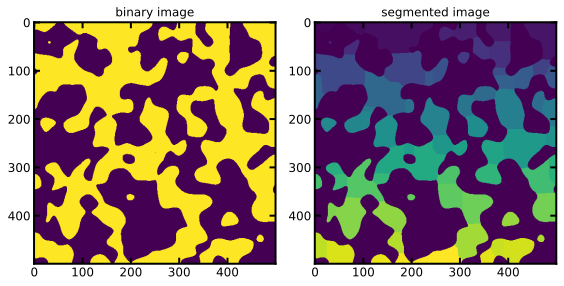

In [2]:
im_binary = ps.generators.blobs(shape=[500, 500],
                                frequency=1,
                                octaves=3,
                                gain=0.5)
im = ps.filters.snow_partitioning(im_binary)
regions = im.regions * im_binary
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im_binary)
ax[1].imshow(regions)
ax[0].set_title('binary image')
ax[1].set_title('segmented image');

## Apply metric function

Output is an array of the amount of voxels with the specified label. `phase_fraction` normalizes the number of voxels in 
each phase by the total number of voxels by default. Note: phase_fraction of void phase in this case indicates porosity of the image.

In [3]:
x = ps.metrics.phase_fraction(im_binary)
print('fractions of void space and solids are ', x[1], 'and', x[0])

fractions of void space and solids are  0.487568 and 0.512432


In [4]:
x = ps.metrics.phase_fraction(im_binary, normed=False)
print('number of voxels of void space and solids are ', x[0], 'and', x[1])

number of voxels of void space and solids are  128108 and 121892


Although `phase_fraction` is mostly used for phases of interests (void, solid, fluid, etc), one can also find voxels fractions of each pore region.

In [5]:
x = ps.metrics.phase_fraction(regions.astype('int'))

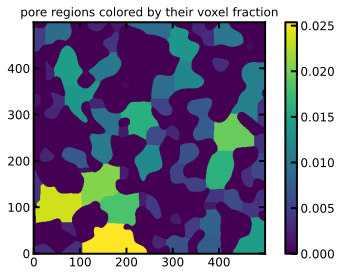

In [6]:
regions_frac = np.array(np.copy(regions), dtype='float')
for i in range(1, len(x)):
    mask = np.array(np.where(regions_frac == i, regions_frac, 0), dtype=bool)
    regions_frac[mask] = x[i]
fig = plt.subplots()
plt.imshow(regions_frac, origin="lower")
plt.colorbar()
plt.title('pore regions colored by their voxel fraction');